<a href="https://colab.research.google.com/github/Gobals89/Kaggle/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris.species.isna().sum()

0

In [ ]:
iris.groupby('species').agg({'petal_length': 'mean','sepal_length': 'mean'})

,petal_length,sepal_length
species,,
setosa,1.462,5.006
versicolor,4.260,5.936
virginica,5.552,6.588


In [ ]:
iris['species_num'] = iris.species.map({'setosa': 1, 'versicolor': 2, 'virginica' : 3})

Text(0.5, 1.0, 'Petal length')

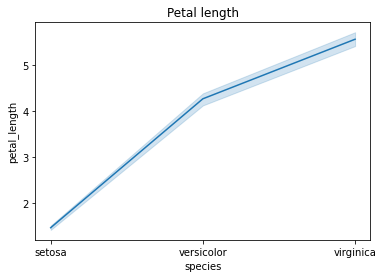

In [ ]:
sns.lineplot(y='petal_length', x='species', data=iris).set_title('Petal length')

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn import tree

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X, y = iris.drop('species', axis=1), iris.species_num

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [ ]:
clf = tree.DecisionTreeRegressor()

In [ ]:
parameters = {'criterion':["squared_error", "absolute_error"], 'splitter':['best'], 'max_depth': [10], 'min_samples_split': [2], 'min_samples_leaf': [2]}

In [ ]:
greed_tree = GridSearchCV(clf, parameters, cv=5)

In [ ]:
greed_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [10], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'splitter': ['best']})

In [ ]:
greed_tree.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
best_clf = greed_tree.best_estimator_
y_predict = best_clf.predict(X_test)

In [ ]:
best_clf.score(X_test, y_predict)

1.0